In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [2]:
titanic=pd.read_csv(r"C:\Users\HP\Desktop\Training\datasets\train.csv")

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic=titanic.drop(columns=['Ticket','Name','Cabin','SibSp','Parch','Fare'])
#titanic=titanic.dropna(axis=1)
titanic

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0,3,male,22.0,S
1,2,1,1,female,38.0,C
2,3,1,3,female,26.0,S
3,4,1,1,female,35.0,S
4,5,0,3,male,35.0,S
...,...,...,...,...,...,...
886,887,0,2,male,27.0,S
887,888,1,1,female,19.0,S
888,889,0,3,female,NaN,S
889,890,1,1,male,26.0,C


In [5]:
#check for null values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Embarked         2
dtype: int64

In [6]:
#titanic=titanic.dropna(subset=['Embarked'])

In [7]:
#titanic.isnull().sum()

<function matplotlib.pyplot.show(*args, **kw)>

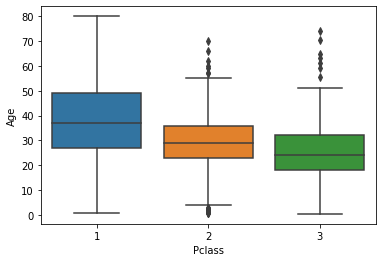

In [8]:
sb.boxplot(x='Pclass',y='Age',data=titanic)
plt.show

In [9]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age  

In [10]:
#titanic['Sex']=LabelEncoder().fit_transform(titanic['Sex'])
#titanic['Embarked']=LabelEncoder().fit_transform(titanic['Embarked'])

In [11]:
titanic['Age']=titanic[['Age','Pclass']].apply(age_approx,axis=1)
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Embarked       2
dtype: int64

In [12]:
titanic['Embarked'].fillna(method='ffill',inplace=True)
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Embarked       0
dtype: int64

In [13]:
lc=LabelEncoder()
titanic['Sex']=lc.fit_transform(titanic['Sex'])
titanic['Embarked']=lc.fit_transform(titanic['Embarked'])

In [14]:
titanic

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0,3,1,22.0,2
1,2,1,1,0,38.0,0
2,3,1,3,0,26.0,2
3,4,1,1,0,35.0,2
4,5,0,3,1,35.0,2
...,...,...,...,...,...,...
886,887,0,2,1,27.0,2
887,888,1,1,0,19.0,2
888,889,0,3,0,24.0,2
889,890,1,1,1,26.0,0


In [15]:
c=titanic.corr()
c

,PassengerId,Survived,Pclass,Sex,Age,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.035840,0.015216
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.047255,-0.172726
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.408487,0.168430
Sex,0.042939,-0.543351,0.131900,1.000000,0.078421,0.113807
Age,0.035840,-0.047255,-0.408487,0.078421,1.000000,-0.016657
Embarked,0.015216,-0.172726,0.168430,0.113807,-0.016657,1.000000


In [16]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Embarked'], dtype='object')

In [17]:
x=titanic.iloc[:,[0,2,3,4,5]].values
y=titanic.iloc[:,1].values

In [18]:
ts_score=[]
l=0.1
for j in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=l,random_state=j)
    lr = LogisticRegression().fit(x_train,y_train)
    ts_score.append(lr.score(x_test,y_test))
k=ts_score.index(np.max(ts_score))
print(k)
#plt.hist(y_train) #to check for outliers

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

41


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=l,random_state=k)

In [20]:
LogReg=LogisticRegression()
LogReg.fit(x_train,y_train)
y_pred=LogReg.predict(x_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
accuracy_score(y_test,y_pred)

0.8777777777777778

In [33]:
c=confusion_matrix(y_test,y_pred)

In [34]:
c

array([[49,  3],
       [ 8, 30]], dtype=int64)

In [35]:
cm=pd.DataFrame(c)

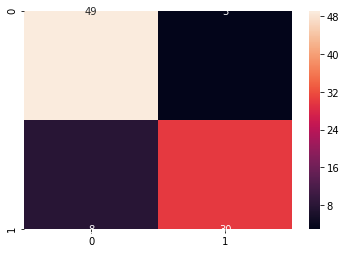

In [36]:
sb.heatmap(cm,annot=True,fmt="d")
plt.show()

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        52
           1       0.91      0.79      0.85        38

    accuracy                           0.88        90
   macro avg       0.88      0.87      0.87        90
weighted avg       0.88      0.88      0.88        90

